In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [239]:
class LogisticRegression:
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    class fit():
        def __init__(self,X,y,itn = 100000, lr = 0.001):
            """ dimension of X is m by n; 
            here, 
            m = #training set and 
            n = #features
            dimension of y is m by 1
            """
            self.iterations = itn;

            # reshape our variables and outcomes for coding convenient
            X = X.T
            y = y.T

            # determine m & n
            m = X.shape[1]
            n = X.shape[0]

            # define theta. Remember, dimesion has to be n by 1
            theta = np.zeros([n,1])
            theta_0 = 0

            cost_list = []


            for i in range(itn):
                # define h_theta
                h_theta = np.dot(theta.T, X) + theta_0

                # call sigmoid function
                predicted_y = LogisticRegression().sigmoid(h_theta)

                cost = (-1/m) *np.sum(y*np.log(predicted_y) + (1-y)*np.log(1-predicted_y))

                #gradient descent
                d_theta = np.dot((predicted_y - y), X.T)
                d_theta = d_theta.T
                d_theta_0 = np.sum(predicted_y - y)

                theta = theta - (lr/m)*d_theta
                theta_0 = theta_0 - (lr/m)*d_theta_0

                #add the cost to the cost list
                cost_list.append(cost)

            #define the variables for the class
            self.all_cost = cost_list
            self.theta = theta
            self.theta_0 = theta_0

        def iterations_vs_cost_graph(self):
            plt.plot(np.arange( self.iterations), self.all_cost)
            plt.xlabel("Number of iterations")
            plt.ylabel("Cost")
            plt.show()

        def predict(self,X):
            theta = self.theta
            theta_0 = self.theta_0
            z = np.dot(theta.T,X.T) + theta_0
            y_predict = LogisticRegression().sigmoid(z)
            y_predict = y_predict > 0.5
            y_predict = np.array(y_predict, dtype="int64")
            return y_predict

        def predict_proba(self,X):
            theta = self.theta
            theta_0 = self.theta_0
            z = np.dot(theta.T,X.T) + theta_0
            return LogisticRegression().sigmoid(z)

        def accuracy(self, X_test, Y_test):
            theta = self.theta
            theta_0 = self.theta_0
            z = np.dot(theta.T,X_test.T) + theta_0
            h = LogisticRegression().sigmoid(z)
            y_predict = h > 0.5
            y_predict = np.array(y_predict, dtype = "int64")
            y_predict = y_predict.T

            return (1 - np.sum(np.abs(y_predict - Y_test))/Y_test.shape[0])*100

In [240]:
test_x = pd.read_csv("test_X.csv")
test_y = pd.read_csv("test_Y.csv")
train_x = pd.read_csv("train_X.csv")
train_y = pd.read_csv("train_Y.csv")


x_train = train_x.drop("Id", axis = 1)
x_test = test_x.drop("Id", axis = 1)
y_train = train_y.drop("Id", axis =1)
y_test = test_y.drop("Id", axis = 1)


X_train = x_train.values
Y_train = y_train.values
X_test = x_test.values
Y_test = y_test.values

In [241]:
lg = LogisticRegression()
classifier = lg.fit(X_train, Y_train)

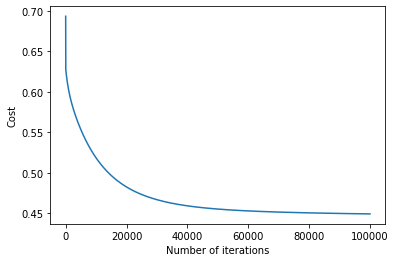

In [242]:
classifier.iterations_vs_cost_graph()

In [246]:
classifier.predict(X_test[0:6,:])

array([[0, 0, 0, 0, 1, 0]], dtype=int64)

In [247]:
classifier.predict_proba(X_test[0:6,:])

array([[0.10288646, 0.48445698, 0.11688396, 0.1232051 , 0.59675765,
        0.15672183]])

In [248]:
classifier.accuracy(X_test, Y_test)

92.10526315789474